In [89]:
from PIL import Image; 

import numpy as np

img = Image.open('../data/rgb2.jpg')

## make it to as x and y cordinate 
x, y = 0,0; 

p = img.getpixel((x, y)); 
print(f"the image mode {img.mode}")
print(p)


the image mode RGB
(254, 0, 0)


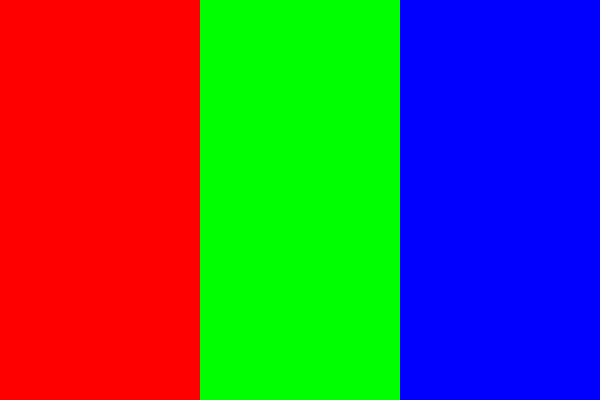

In [75]:
display(img)

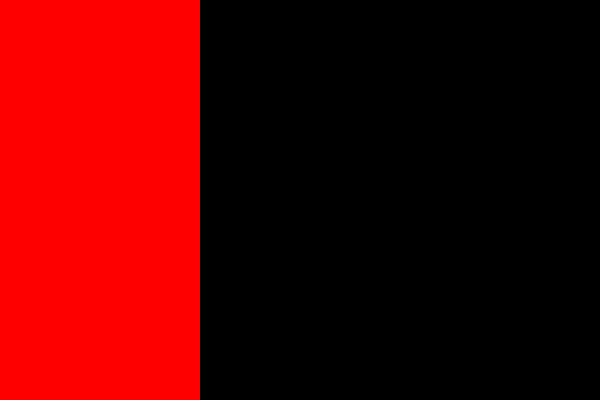

In [74]:
## manipulate the entar image 

# copy the image 
img_copy = img.copy()

for x in range(img_copy.width):
    for y in range(img_copy.height): 
        ## the pixel values 
        p= img_copy.getpixel((x, y)); 
        
        ##make if the certain pixel value is is  greater than 50 
        
        if((p[0]-p[1])>50) and ((p[0] - p[2])>50):
            ## if that stisfied make the as the image is it 
            p= (p[0], p[1], p[2])
        else: 
            ## make it black for the whole image 
            p =(0,0,0)
            #print(p)
            ## than modified to 
        img_copy.putpixel((x, y), p)
        

## display the image di

display(img_copy)
        

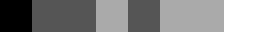

In [ ]:
## Make the color image to Graryscale

img2 = Image.open('../data/colorbar.png')

## create a new grayscale with same size 
rgb_to_grayscale = Image.new('L', img2.size)

for x in range(img2.width): 
    for y in range(img2.height):
        
        ##get the pixel value of the original image 
        p = img2.getpixel((x, y))
        ## use v technique with k means 
        v = int((p[0]+p[1]+p[2])/3.0)
        
        ## than make the update of the update grayscale image 
        rgb_to_grayscale.putpixel((x, y), v)
        

display(rgb_to_grayscale)

## 

In [113]:

def rgbToHsv(RGB):
    
    #first normalize it 
    RGB = np.array(RGB).astype(float) /255.0; 
    # than make it hsv variable to store the same shape of the rgb image
    HSV = np.zeros(RGB.shape);
    
    ## make it loop through the image as x columns and y as rows corresponding 
    for x in range(RGB.shape[0]):
        for y in range(RGB.shape[1]): 
            
            ## get every value of the r g b from the pixel 
            R, G, B = RGB[x, y, :]
            
            #calculate the max value of the rgb values 
            V = np.max((R, G, B)); 
            m = np.min((R, G, B)); 
            c = V-m;
            ##calculate saturation 
            if V == 0.0: 
                S = 0.0; 
            else:
                S = c/V; 
            
            ## calculate the hue 
            
            if c == 0.0: 
                H = 0.0; 
            else:
                if V == R:
                    H_prime = (G - B) / c;
                elif V== G:
                    H_prime = (B - R) / c + 2 
                elif V == B: 
                    H_prime = (R - G)/ c +  4; 
                
                if H_prime < 0: 
                    H = H_prime / 6 + 1
                else: 
                    H = H_prime / 6; 
            
            HSV[x, y, 0] = H; 
            HSV[x, y, 1] = S; 
            HSV[x, y, 2] = V; 
    
    return HSV    
                    


In [120]:
test_image = Image.open("../data/dog.jpg")
hsv_image = rgbToHsv(test_image); 

H = Image.fromarray((hsv_image[:,:,0] * 255).astype(np.uint8))
S = Image.fromarray((hsv_image[:,:,1] * 255).astype(np.uint8))
V = Image.fromarray((hsv_image[:,:,2] * 255).astype(np.uint8))


## take  a look what is produces the value of hsv 

display(hsv_image  * 255)


array([[[ 47.8125    ,  35.17241379,  58.        ],
        [ 47.8125    ,  34.57627119,  59.        ],
        [ 47.8125    ,  33.44262295,  61.        ],
        ...,
        [ 19.55      , 178.32167832, 143.        ],
        [  7.08333333, 137.52808989,  89.        ],
        [ 51.73913043,  83.78571429,  70.        ]],

       [[ 47.8125    ,  34.57627119,  59.        ],
        [ 47.8125    ,  34.57627119,  59.        ],
        [ 47.8125    ,  34.        ,  60.        ],
        ...,
        [ 19.1011236 , 183.02419355, 124.        ],
        [  8.89534884, 130.53571429,  84.        ],
        [ 63.75      ,  87.42857143,  70.        ]],

       [[ 47.8125    ,  34.57627119,  59.        ],
        [ 47.8125    ,  34.57627119,  59.        ],
        [ 47.8125    ,  34.        ,  60.        ],
        ...,
        [ 16.88356164, 189.94897959,  98.        ],
        [  7.08333333,  98.07692308,  78.        ],
        [ 79.20454545,  89.04761905,  63.        ]],

       ...,

      